# **Chapter 5. 머신러닝(Machine Learning) 기초** 





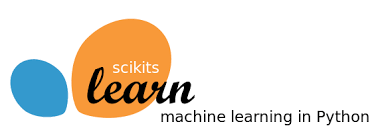


---
### **학습 목표**
> 5-1. 머신 러닝 개요 <br>
> 5-2. sklearn 이란? <br>
> **5-3. 전처리 기본 (정규화, 표준화, 범주형 데이터, 학습/테스트 세트 분할)** <br>
> 5-4. 분류 분석 모델링 <br>
> 5-5. 분류 성능 평가하기 <br>
> 5-6. 회귀 분석 모델링 <br>
> 5-7. 회귀 성능 평가하기 <br>
> 5-8. 앙상블 모델링 <br>
> 5-9. 하이퍼파라미터(hyper-parameter) 튜닝 <br>
> 5-10. 비지도 군집화 분석

## 5-3. 전처리 기본 (정규화, 표준화, 범주형 데이터, 학습/테스트 세트 분할)

> - 머신러닝을 적용할 때 가장 중요한 부분은 '**데이터 전처리**' 입니다.
> - 보통 데이터 분석가는 머신러닝 모델의 성능을 향상하기 위한 작업 중 **70% 이상의 시간을 전처리에 할애**합니다. 
> - 전처리 작업에는 **결측값 처리, 정규화/표준화(수치형), 범주형 데이터의 수치형 변환, 학습/테스트 분할, Feature Engineering 등**이 있습니다.

In [ ]:
# 라이브러리 불러오기
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
# 실습 데이터 세트 로드 (펭귄 데이터)
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
# 결측값 제거
penguins = penguins.dropna().reset_index(drop=True)

In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.3+ KB


> ###  **5-3-1. 정규화(Normalization), 표준화(Standardization)**


> - 정규화와 표준화는 모두 **수치형** 데이터 전처리에서 중요한 요소입니다. 
> - 학습 데이터의 feature 간 **단위나 스케일(scale) 차이가 클 수록 학습 모델의 성능이 저하**될 수 있습니다.
> - 따라서 수치형 데이터의 **단위를 맞춰주는 작업을 스케일링(scaling)** 이라고 합니다.
> - 스케일링에는 일정 구간을 정해주는 **정규화(Normalization)** 방법과 평균(0) 과 표준편차(1) 를 사용하는 **표준화(Standardization)** 방법이 있습니다.
>


> 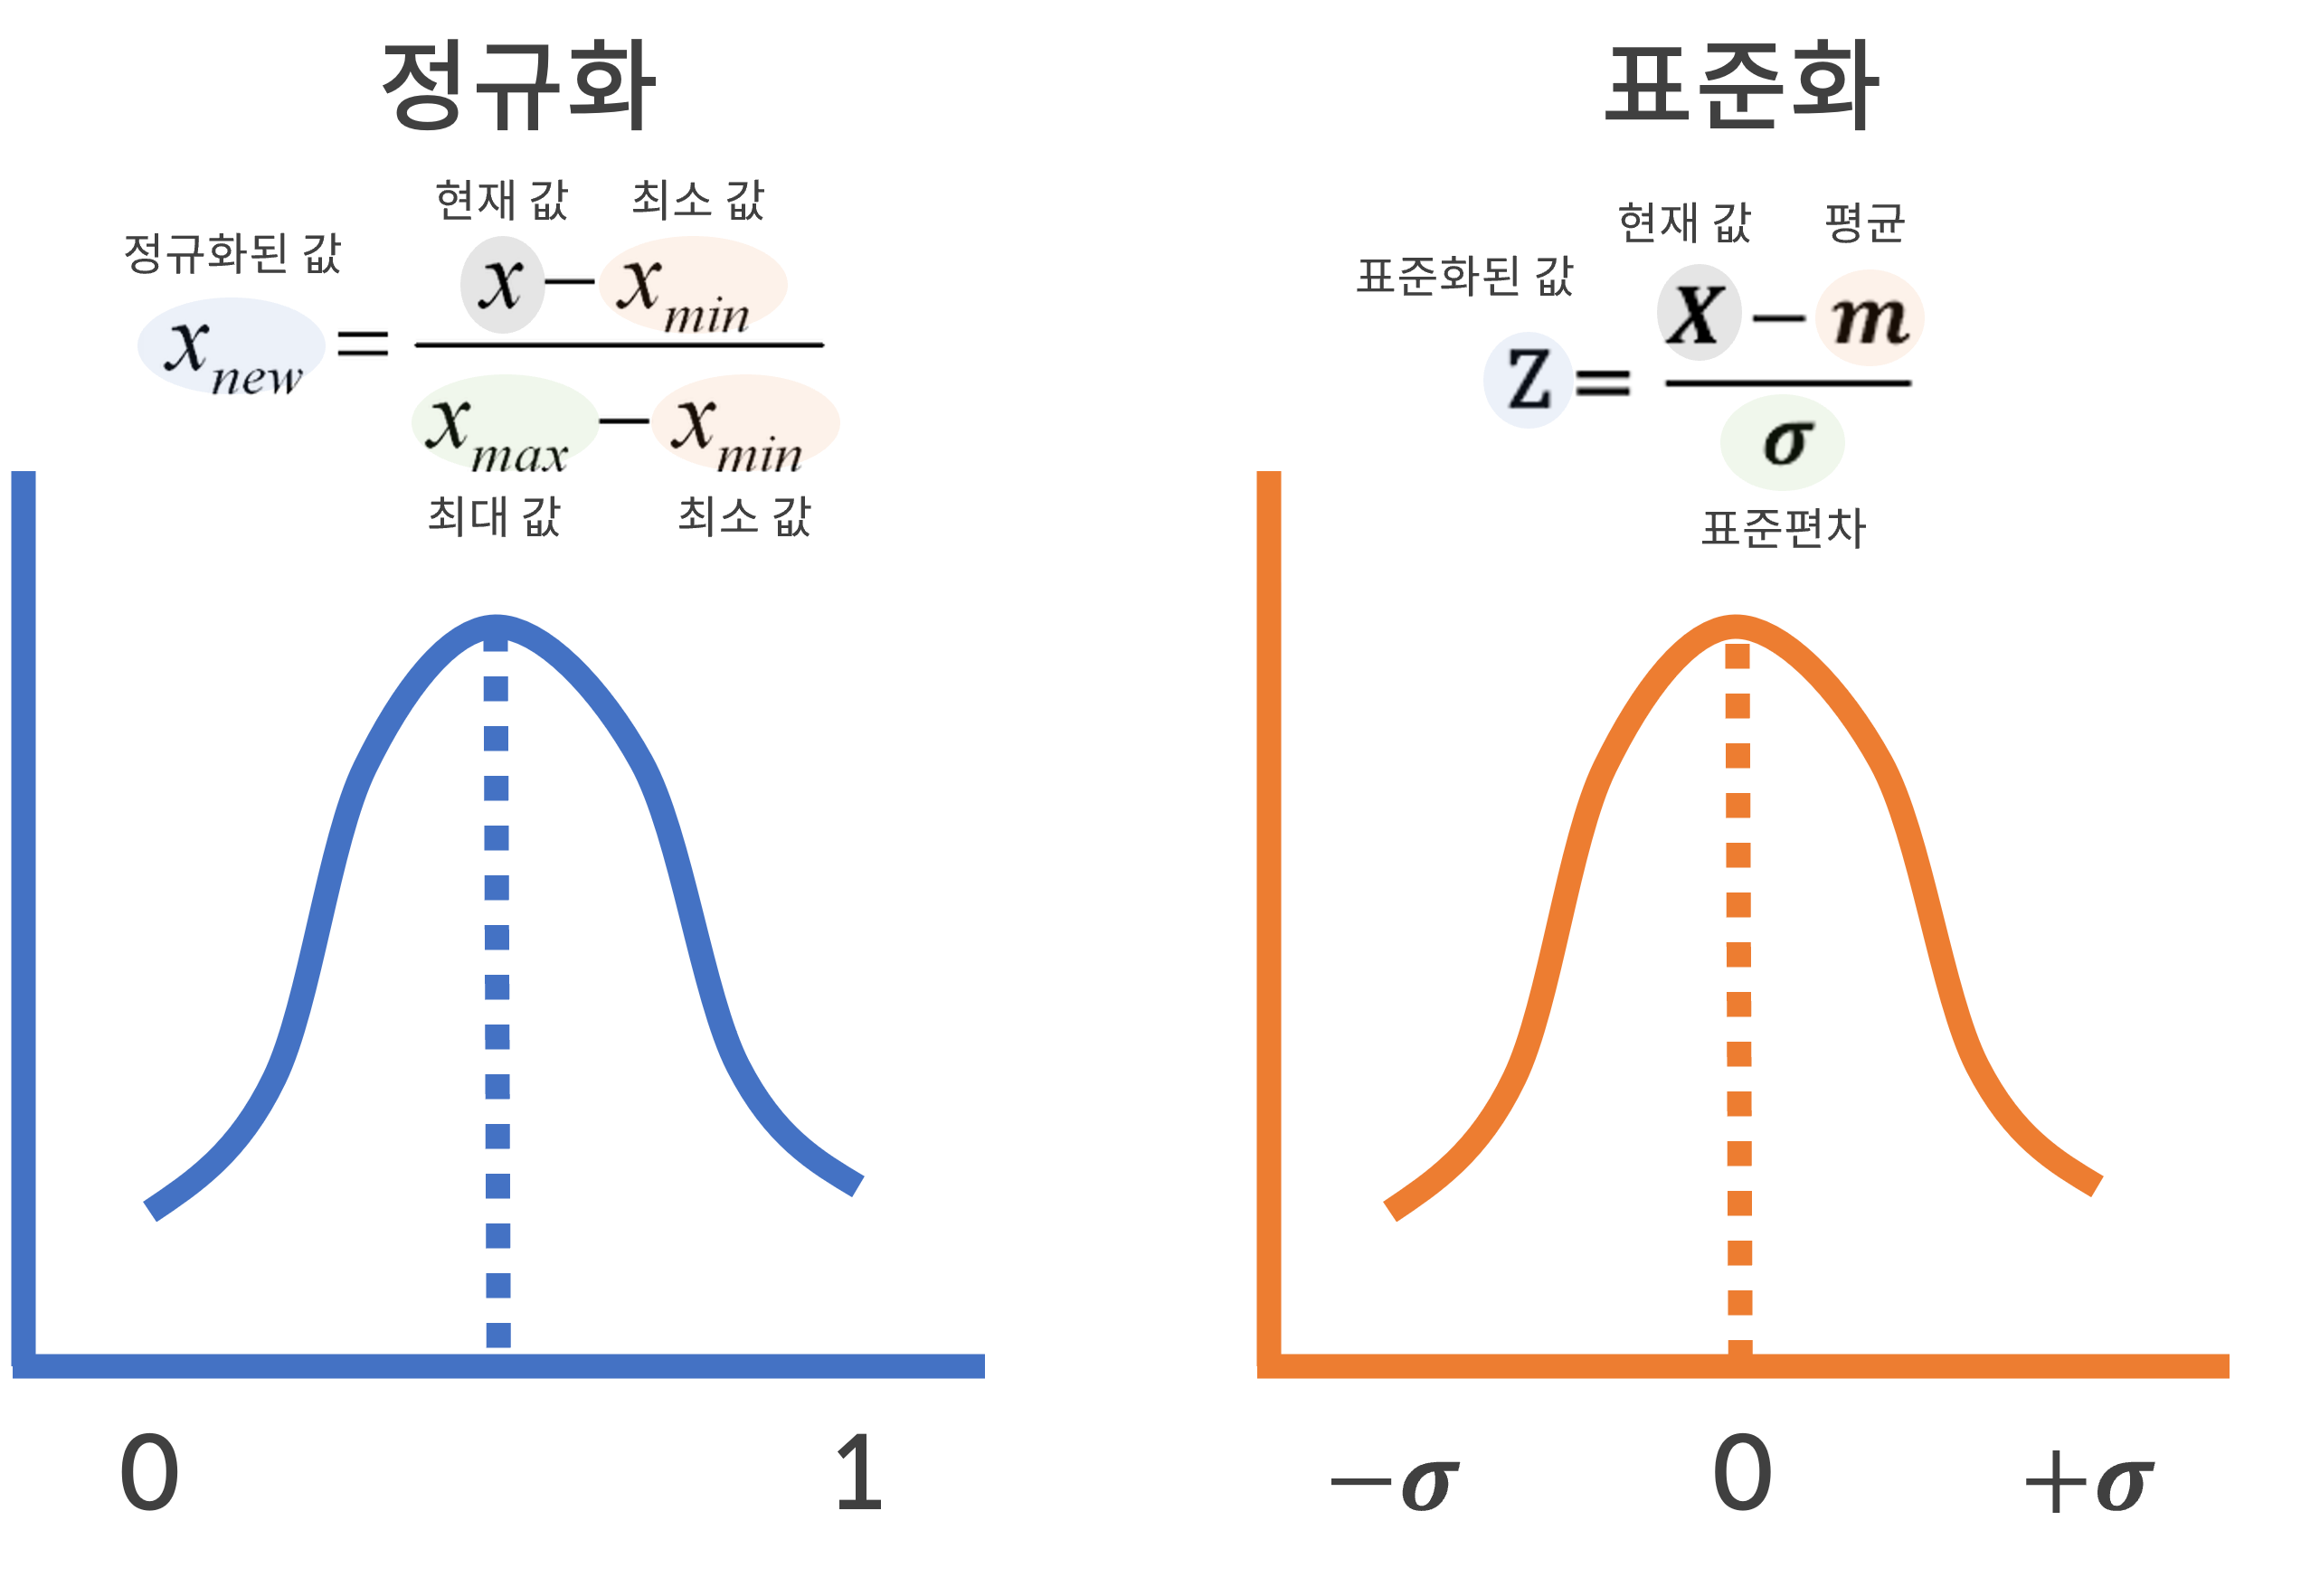

In [ ]:
# feature 들 간 단위가 다릅니다.
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


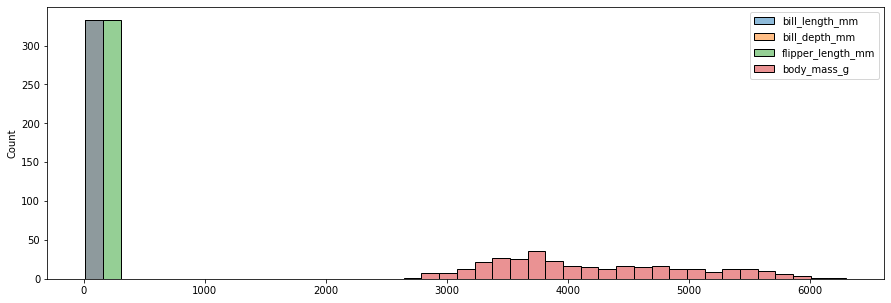

In [ ]:
# 데이터 분포 확인
plt.figure(figsize=(15, 5))
sns.histplot(data=penguins)

> **정규화 (Normalization)**
> - **`MinMaxScaler`** 를 활용한 0-1 사이 분포 만들기
> - 같은 범위의 데이터로 변환하기 때문에, **모델 학습 성능이 좋아지고, 학습 시간이 줄어드는 효과**가 있습니다.
> - 자릿수가 늘어나지 않아 **연산 오버플로우 (numeric overflow) 를 방지**할 수 있습니다.

In [ ]:
from sklearn.preprocessing import MinMaxScaler  # 라이브러리 로딩
scaler = MinMaxScaler() # 스케일러 정의

penguins_normed = penguins.copy()
features = penguins_normed[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]    # 정규화 대상 컬럼
features_normed = scaler.fit_transform(features)    # 정규화 

In [ ]:
# 정규화 된 데이터로 바꿔주기
penguins_normed = penguins_normed.assign(bill_length_mm = features_normed[:,0],
                                         bill_depth_mm = features_normed[:,1],
                                         flipper_length_mm = features_normed[:,2],
                                         body_mass_g = features_normed[:,3])
penguins_normed

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,0.254545,0.666667,0.152542,0.291667,Male
1,Adelie,Torgersen,0.269091,0.511905,0.237288,0.305556,Female
2,Adelie,Torgersen,0.298182,0.583333,0.389831,0.152778,Female
3,Adelie,Torgersen,0.167273,0.738095,0.355932,0.208333,Female
4,Adelie,Torgersen,0.261818,0.892857,0.305085,0.263889,Male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,0.549091,0.071429,0.711864,0.618056,Female
329,Gentoo,Biscoe,0.534545,0.142857,0.728814,0.597222,Female
330,Gentoo,Biscoe,0.665455,0.309524,0.847458,0.847222,Male
331,Gentoo,Biscoe,0.476364,0.202381,0.677966,0.694444,Female


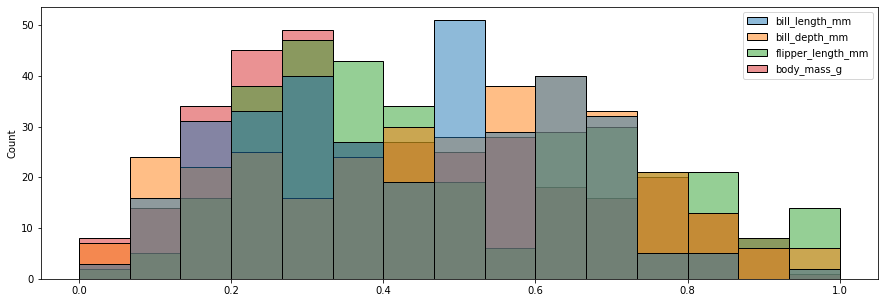

In [ ]:
# 데이터 분포 확인
plt.figure(figsize=(15, 5))
sns.histplot(data=penguins_normed)

> **표준화 (Standardization)**
> - **`StandardScaler`** 를 활용한 평균 0, 표준편차 1 분포 만들기
> - 만약 Feature 간 **단위 차이가 극심하게 차이가 나는 상황**이라면, 정규화 보다는 **표준화 방법이 선호**됩니다 (정규화는 작은 범위로 데이터를 압축하기 때문에 정보 손실이 발생합니다). 
> - **비지도 학습** (최대 최소 범위를 알기 힘든 상황) 에서도 **표준화 방법이 선호**됩니다.

In [ ]:
from sklearn.preprocessing import StandardScaler  # 라이브러리 로딩
scaler = StandardScaler() # 스케일러 정의

penguins_scaled = penguins.copy()
features = penguins_scaled[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]    # 표준화 대상 컬럼
features_stand = scaler.fit_transform(features)    # 표준화 

In [ ]:
# 표준화 된 데이터로 바꿔주기
penguins_scaled = penguins_scaled.assign(bill_length_mm = features_stand[:,0],
                                         bill_depth_mm = features_stand[:,1],
                                         flipper_length_mm = features_stand[:,2],
                                         body_mass_g = features_stand[:,3])
penguins_scaled

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.896042,0.780732,-1.426752,-0.568475,Male
1,Adelie,Torgersen,-0.822788,0.119584,-1.069474,-0.506286,Female
2,Adelie,Torgersen,-0.676280,0.424729,-0.426373,-1.190361,Female
3,Adelie,Torgersen,-1.335566,1.085877,-0.569284,-0.941606,Female
4,Adelie,Torgersen,-0.859415,1.747026,-0.783651,-0.692852,Male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,0.587352,-1.762145,0.931283,0.892957,Female
329,Gentoo,Biscoe,0.514098,-1.457000,1.002739,0.799674,Female
330,Gentoo,Biscoe,1.173384,-0.744994,1.502928,1.919069,Male
331,Gentoo,Biscoe,0.221082,-1.202712,0.788372,1.234995,Female


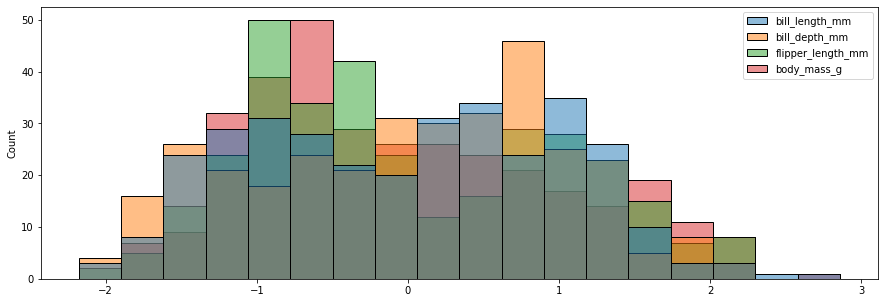

In [ ]:
# 데이터 분포 확인
plt.figure(figsize=(15, 5))
sns.histplot(data=penguins_scaled)

> ###  **5-3-2. 범주형 데이터의 수치화 (인코딩, Encoding)**
> - scikit-learn 의 머신 러닝 알고리즘은 **범주형 데이터를 계산할 수 없습니다.**
> - 따라서 일반적으로 **범주형 데이터를 수치화(인코딩) 해서 사용**합니다.
> - 범주형 데이터 수치화 방법 : 대표적으로 **`라벨 인코딩(Label Encoding)`**, **`원핫 인코딩(One-hot Encoding`** 방법이 있습니다.


In [ ]:
penguins_scaled

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.896042,0.780732,-1.426752,-0.568475,Male
1,Adelie,Torgersen,-0.822788,0.119584,-1.069474,-0.506286,Female
2,Adelie,Torgersen,-0.676280,0.424729,-0.426373,-1.190361,Female
3,Adelie,Torgersen,-1.335566,1.085877,-0.569284,-0.941606,Female
4,Adelie,Torgersen,-0.859415,1.747026,-0.783651,-0.692852,Male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,0.587352,-1.762145,0.931283,0.892957,Female
329,Gentoo,Biscoe,0.514098,-1.457000,1.002739,0.799674,Female
330,Gentoo,Biscoe,1.173384,-0.744994,1.502928,1.919069,Male
331,Gentoo,Biscoe,0.221082,-1.202712,0.788372,1.234995,Female


In [ ]:
penguins_scaled['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [ ]:
penguins_scaled['sex'].unique()

array(['Male', 'Female'], dtype=object)

> **라벨 인코딩 (Label Encoding)**
> - 범주형 데이터의 **범주 가짓수에 따라 숫자를 할당**해주는 방법입니다.

In [ ]:
from sklearn.preprocessing import LabelEncoder  # 라이브러리 로딩
encoder = LabelEncoder() # 인코더 정의

penguins_label = penguins_scaled.copy()
features = penguins_label[['species', 'island', 'sex']]    # 인코딩 대상 컬럼
encoded = features.apply(encoder.fit_transform)    # 인코딩 실행 

In [ ]:
# 수치형 데이터로 바꿔주기
penguins_label = penguins_label.assign(species = encoded['species'],
                                           island = encoded['island'],
                                           sex = encoded['sex'])
penguins_label

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,-0.896042,0.780732,-1.426752,-0.568475,1
1,0,2,-0.822788,0.119584,-1.069474,-0.506286,0
2,0,2,-0.676280,0.424729,-0.426373,-1.190361,0
3,0,2,-1.335566,1.085877,-0.569284,-0.941606,0
4,0,2,-0.859415,1.747026,-0.783651,-0.692852,1
...,...,...,...,...,...,...,...
328,2,0,0.587352,-1.762145,0.931283,0.892957,0
329,2,0,0.514098,-1.457000,1.002739,0.799674,0
330,2,0,1.173384,-0.744994,1.502928,1.919069,1
331,2,0,0.221082,-1.202712,0.788372,1.234995,0


> **원핫 인코딩 (One Hot Encoding)**
> - 범주형 데이터의 **범주 가짓수에 컬럼을 추가**해주는 방법입니다.
> - **범주에 포함되는 컬럼에 1**을 부여하고 **다른 컬럼은 0**을 부여합니다.

In [ ]:
from sklearn.preprocessing import OneHotEncoder  # 라이브러리 로딩
encoder = OneHotEncoder() # 인코더 정의

penguins_onehot = penguins_scaled.copy()
features = penguins_onehot[['species', 'island', 'sex']]    # 인코딩 대상 컬럼
encoded = encoder.fit_transform(features).toarray()    # 인코딩 실행 

In [ ]:
encoded

array([[1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [ ]:
encoder.categories_

[array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 array(['Biscoe', 'Dream', 'Torgersen'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [ ]:
# 기존 범주형 컬럼 버리기
penguins_onehot = penguins_onehot.drop(columns=['species', 'island', 'sex'])

# 인코딩 결과 데이터 프레임 생성
encoded_df = pd.DataFrame(encoded)
encoded_df.columns = encoder.get_feature_names_out()

# 기존 데이터 프레임과 결합
penguins_onehot = pd.concat([penguins_onehot, encoded_df], axis=1)

In [ ]:
penguins_onehot

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,-0.896042,0.780732,-1.426752,-0.568475,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.822788,0.119584,-1.069474,-0.506286,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-0.676280,0.424729,-0.426373,-1.190361,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,-1.335566,1.085877,-0.569284,-0.941606,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,-0.859415,1.747026,-0.783651,-0.692852,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.587352,-1.762145,0.931283,0.892957,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
329,0.514098,-1.457000,1.002739,0.799674,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
330,1.173384,-0.744994,1.502928,1.919069,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
331,0.221082,-1.202712,0.788372,1.234995,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


> ###  **5-3-3. 학습/테스트 데이터 세트 분할**


> - scikit-learn 은 **학습/테스트 데이터 세트를 자동으로 분할**해주는 기능을 제공합니다.
> - 테스트에 사용하고 싶은 데이터를 비율로 조정할 수 있습니다.


In [ ]:
penguins_label.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,-0.896042,0.780732,-1.426752,-0.568475,1
1,0,2,-0.822788,0.119584,-1.069474,-0.506286,0
2,0,2,-0.676280,0.424729,-0.426373,-1.190361,0
3,0,2,-1.335566,1.085877,-0.569284,-0.941606,0
4,0,2,-0.859415,1.747026,-0.783651,-0.692852,1


In [ ]:
from sklearn.model_selection import train_test_split    # 라이브러리 로딩

X = penguins_label.drop('sex', axis=1)  # 예측에 사용할 변수 
Y = penguins_label['sex']               # 예측할 변수

In [ ]:
# 학습 / 테스트 세트 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

In [ ]:
len(X_train), len(Y_train), len(Y_test), len(Y_test)

(266, 266, 67, 67)

In [ ]:
X_train

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
194,1,1,1.374833,0.780732,-0.998018,-1.190361
226,2,0,0.276022,-1.762145,0.931283,0.550920
285,2,0,0.459158,-1.202712,1.145650,1.234995
173,1,1,1.008563,0.933305,-0.069095,-0.506286
261,2,0,0.166141,-1.965576,0.859828,1.110617
...,...,...,...,...,...,...
156,1,1,0.477471,0.323014,-0.569284,-0.506286
94,0,0,-1.646896,0.373872,-0.640740,-0.599569
167,1,1,0.825428,0.170442,-0.712196,-1.003795
214,2,0,0.385904,-2.016433,0.716916,0.364354


In [ ]:
Y_test

115    1
78     0
150    1
237    1
97     1
      ..
180    1
121    1
298    0
153    1
308    1
Name: sex, Length: 67, dtype: int64